<a href="https://colab.research.google.com/github/SaugataChoudhury/NIDS/blob/main/NIDS_implementation_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d cicdataset/cicids2017

 91% 210M/230M [00:01<00:00, 181MB/s]
100% 230M/230M [00:01<00:00, 136MB/s]


In [ ]:
! unzip /content/cicids2017.zip

Archive:  /content/cicids2017.zip
  inflating: MachineLearningCSV.md5  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  


In [ ]:
import numpy as np
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False
df1=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [ ]:
nRowsRead = None
df1_sampled = df1.sample(frac=0.25, random_state=0)
df2_sampled = df2.sample(frac=0.25, random_state=0)
df3_sampled = df3.sample(frac=0.25, random_state=0)
df4_sampled = df4.sample(frac=0.25, random_state=0)

# Concatenate the sampled datasets
df = pd.concat([df1_sampled, df2_sampled, df3_sampled, df4_sampled])

df.shape

(308291, 79)

In [ ]:
df[' Label'].value_counts()

BENIGN      236075
PortScan     39710
DDoS         31993
Bot            513
Name:  Label, dtype: int64

In [ ]:
df.duplicated().sum()

13652

In [ ]:
df.shape

(308291, 79)

In [ ]:
df =  df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(294639, 79)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    29
 Destination Port                0
 Bwd Avg Bytes/Bulk              0
 Fwd Avg Packets/Bulk            0
Fwd Avg Bytes/Bulk               0
 Fwd Header Length.1             0
 Avg Bwd Segment Size            0
 Avg Fwd Segment Size            0
 Average Packet Size             0
 Down/Up Ratio                   0
 ECE Flag Count                  0
 CWE Flag Count                  0
 URG Flag Count                  0
 ACK Flag Count                  0
 PSH Flag Count                  0
 RST Flag Count                  0
 SYN Flag Count                  0
FIN Flag Count                   0
 Packet Length Variance          0
 Fwd Avg Bulk Rate               0
 Bwd Avg Packets/Bulk            0
 Packet Length Mean              0
Active Mean                      0
 Idle Min                        0
 Idle Max                        0
 Idle Std                        0
Idle Mean                        0
 Active Min                      0
 Active Max         

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(294610, 79)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port               0
 ECE Flag Count                 0
 Fwd Avg Packets/Bulk           0
Fwd Avg Bytes/Bulk              0
 Fwd Header Length.1            0
 Avg Bwd Segment Size           0
 Avg Fwd Segment Size           0
 Average Packet Size            0
 Down/Up Ratio                  0
 CWE Flag Count                 0
 Bwd Avg Bytes/Bulk             0
 URG Flag Count                 0
 ACK Flag Count                 0
 PSH Flag Count                 0
 RST Flag Count                 0
 SYN Flag Count                 0
FIN Flag Count                  0
 Packet Length Variance         0
 Fwd Avg Bulk Rate              0
 Bwd Avg Packets/Bulk           0
 Packet Length Mean             0
Active Mean                     0
 Idle Min                       0
 Idle Max                       0
 Idle Std                       0
Idle Mean                       0
 Active Min                     0
 Active Max                     0
 Active Std                     0
 min_seg_size_

In [ ]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN      229617
PortScan     32489
DDoS         31993
Name:  Label, dtype: int64

In [ ]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [ ]:
df.shape

(294099, 79)

In [ ]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# df.reset_index(drop=True,inplace=True)

<ipython-input-23-ecdbaf5cef6e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [ ]:
df.shape

(293929, 79)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.85)
corr_features

<ipython-input-25-84b92732dab5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 'Bwd IAT Total',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets',
 'Total Length of Fwd Packets'}

In [ ]:
df.drop(corr_features,axis=1,inplace=True)

In [ ]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [ ]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Fwd IAT Std,Bwd IAT Std,Bwd IAT Max,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Idle Std
155412,80,65,2,6,6,0,0,184615.390625,30769.230469,6.500000e+01,0.000000e+00,65,0.000000e+00,0.000000e+00,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,0,256,-1,20,0.0,0.0,0,0.0
42092,52617,9084093,1,6,6,6,6,3.962971,0.660495,1.816819e+06,4.046140e+06,4,0.000000e+00,4.522723e+06,9054745,0,0,0,0,20,100,0.550413,6,0,0,0,1,1,0,5,0,0,0,0,0,0,229,0,20,29348.0,0.0,29348,0.0
180167,80,90019,3,20,0,5840,0,129228.273438,99.978897,1.125238e+04,3.141964e+04,3,4.497199e+02,3.970995e+04,89011,0,0,0,0,72,132,66.652596,0,0,0,1,0,0,0,2,0,0,0,0,0,0,8192,229,20,0.0,0.0,0,0.0
124403,80,1761929,3,20,0,7215,0,6599.017090,3.972918,2.936548e+05,7.176569e+05,7,2.123442e+03,1.014352e+06,1758564,0,0,0,0,72,92,2.270239,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8192,229,20,0.0,0.0,0,0.0
124579,80,89837362,8,20,0,11595,0,129.823486,0.133575,8.167033e+06,2.340000e+07,3,2.910000e+07,3.010745e+05,521994,0,0,0,0,172,92,0.044525,0,0,0,0,1,0,0,0,0,0,0,0,0,0,256,229,20,999.0,0.0,999,47300000.0


In [ ]:
y.head()

155412    BENIGN
42092     BENIGN
180167      DDoS
124403      DDoS
124579      DDoS
Name:  Label, dtype: object

In [ ]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [ ]:
Xn.head()
Xn.shape

(95976, 43)

In [ ]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ada
start = time.time()
ada_boost_model = ada(n_estimators=50,
                         learning_rate=1)
ada_boost_model.fit(X_train, Y_train)
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  8.755900621414185  seconds


In [ ]:
from sklearn import metrics
Predict_X =  ada_boost_model.predict(X_train)
scores = cross_val_score(ada_boost_model, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)

In [ ]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.8535509568333889

Model Accuracy:
 0.8894660851703556

Confusion matrix:
 [[15116  2628  4680]
 [   20 22243     0]
 [   98     0 22398]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       0.99      0.67      0.80     22424
        DDoS       0.89      1.00      0.94     22263
    PortScan       0.83      1.00      0.90     22496

    accuracy                           0.89     67183
   macro avg       0.90      0.89      0.88     67183
weighted avg       0.90      0.89      0.88     67183




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
start = time.time()
Random_Forest = RFC(max_depth=40)
Random_Forest.fit(X_train, Y_train)
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  7.030114650726318  seconds


In [ ]:
from sklearn import metrics
Predict_X =  Random_Forest.predict(X_train)
scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy_rf = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix_rf = metrics.confusion_matrix(Y_train, Predict_X)
classification_rf = metrics.classification_report(Y_train, Predict_X)

In [ ]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy_rf)
print()
print("Confusion matrix:" "\n", confusion_matrix_rf)
print()
print("Classification report:" "\n", classification_rf)
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9997469648915411

Model Accuracy:
 0.9999851152821398

Confusion matrix:
 [[22424     0     0]
 [    1 22262     0]
 [    0     0 22496]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     22424
        DDoS       1.00      1.00      1.00     22263
    PortScan       1.00      1.00      1.00     22496

    accuracy                           1.00     67183
   macro avg       1.00      1.00      1.00     67183
weighted avg       1.00      1.00      1.00     67183




In [ ]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

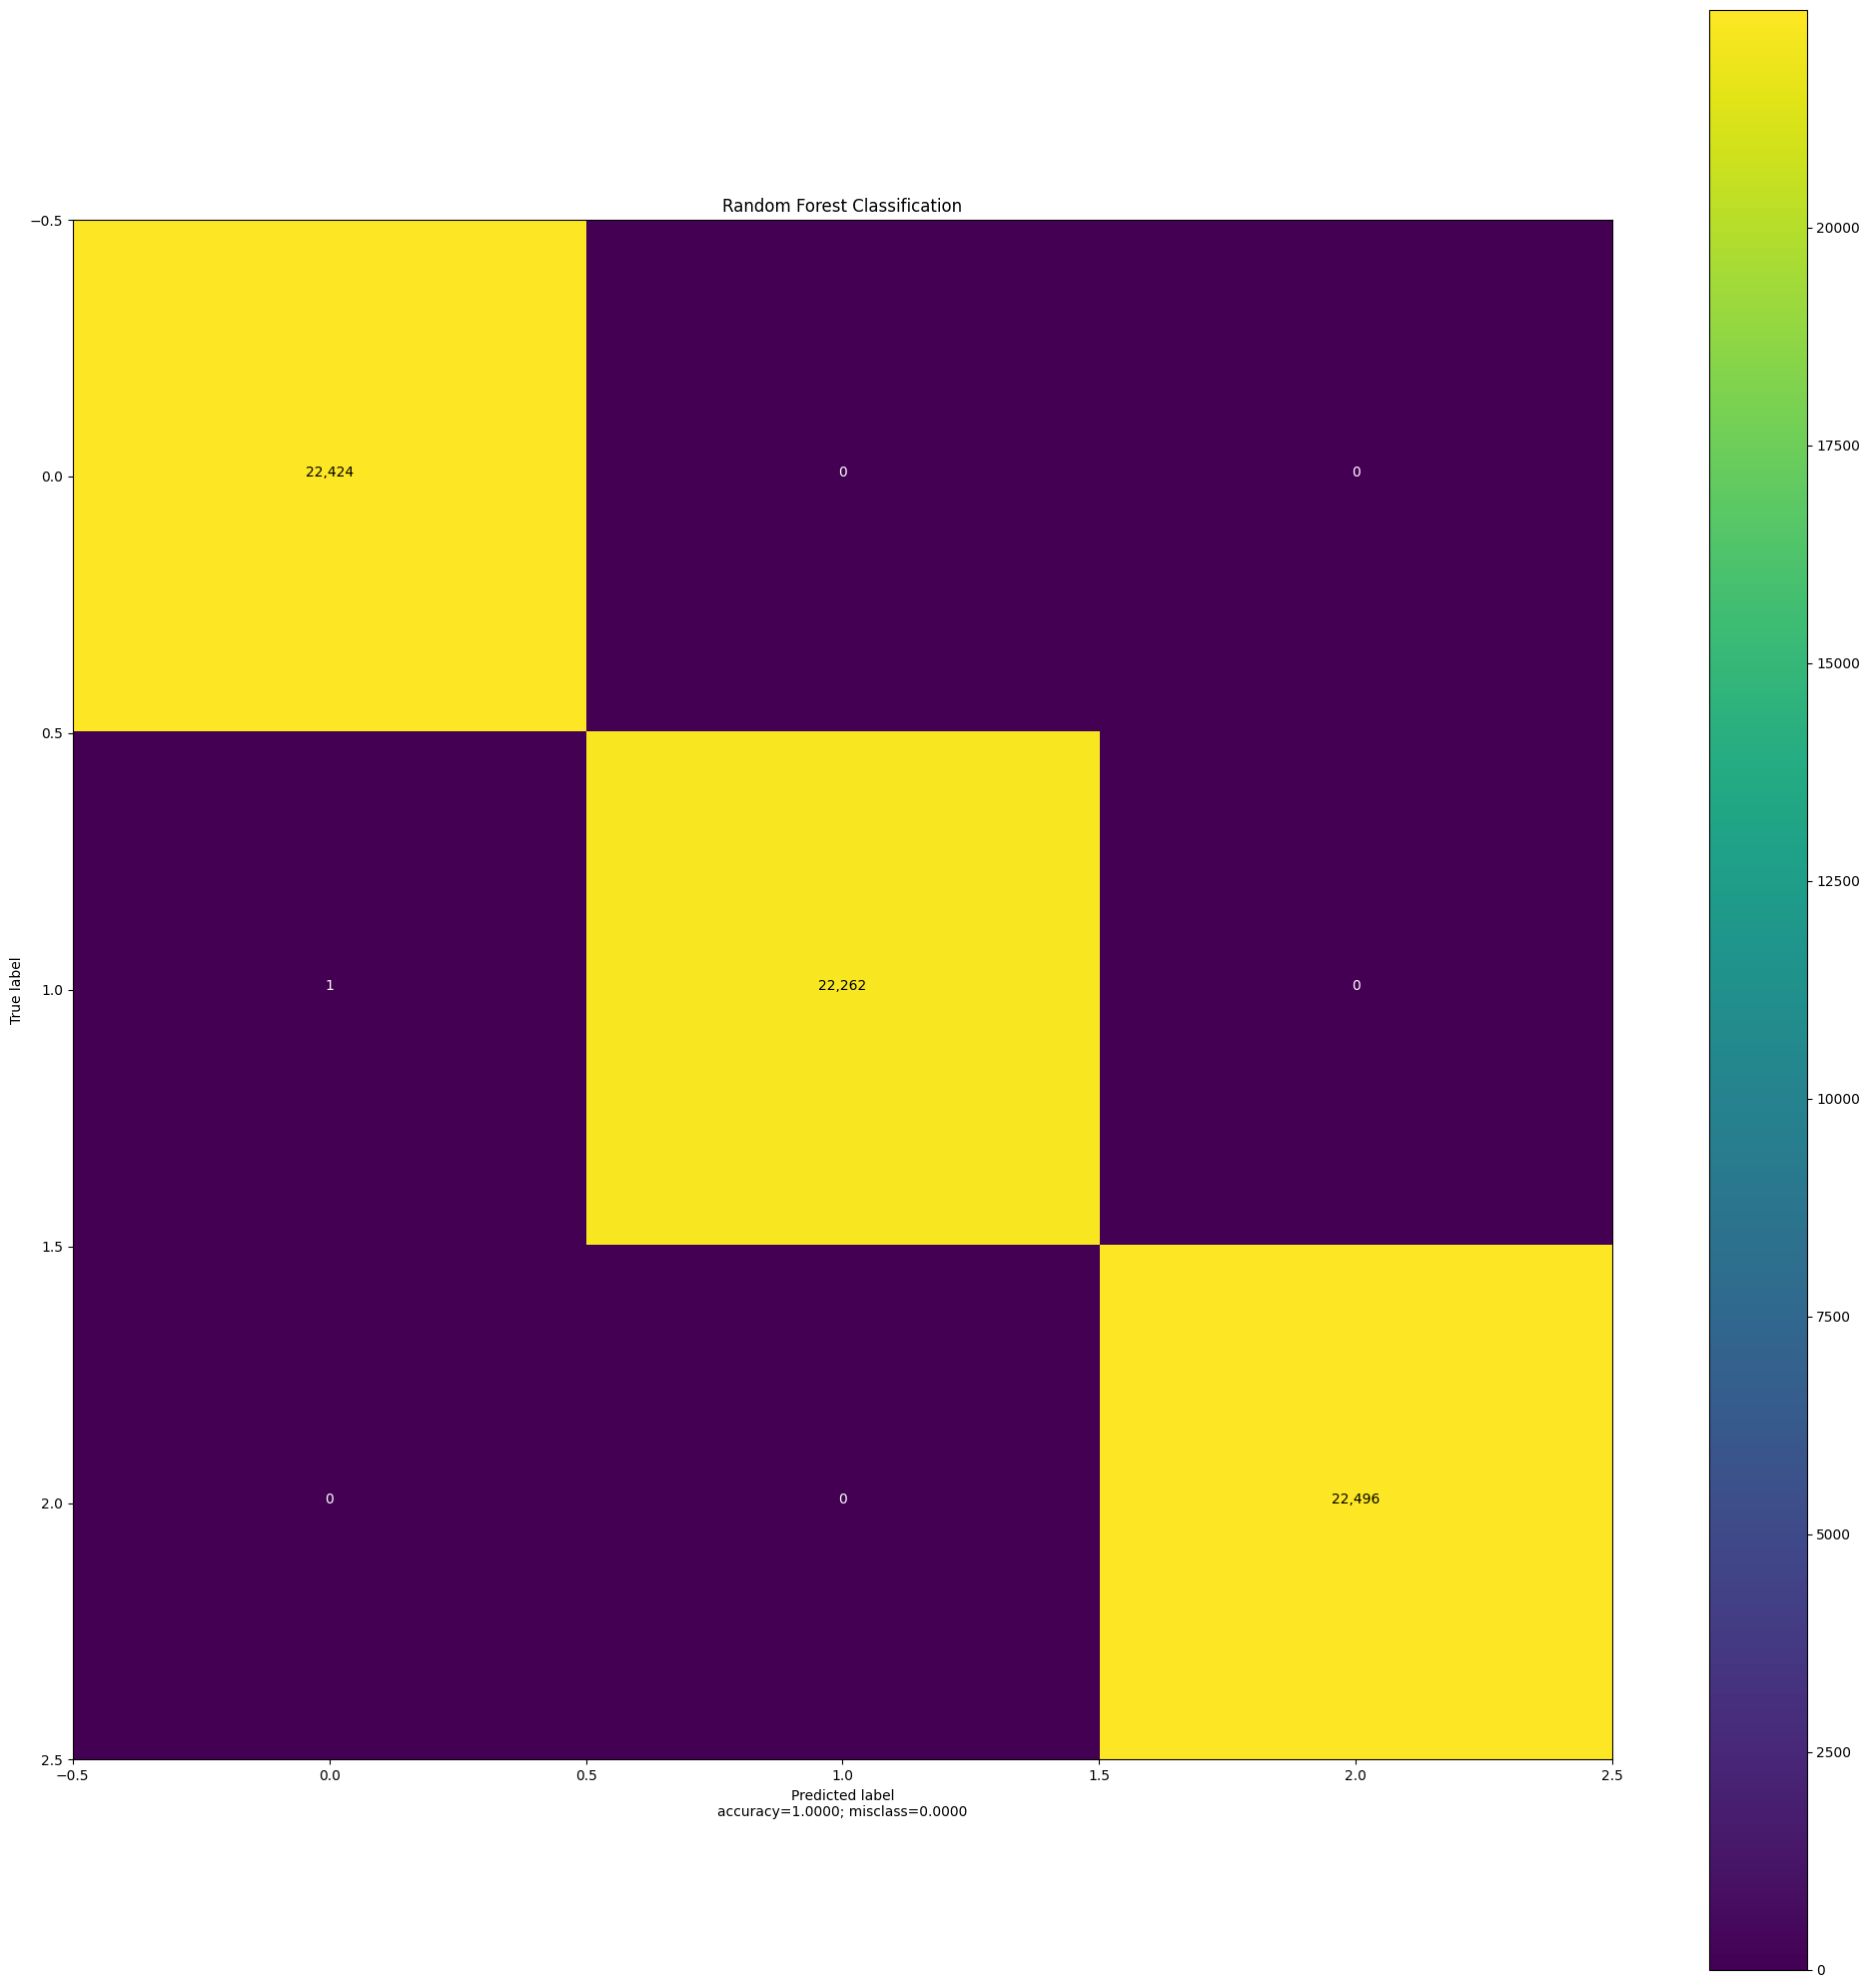

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm=confusion_matrix_rf ,title= 'Random Forest Classification')

In [ ]:
Predict_X =  Random_Forest.predict(X_test)
scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
accuracy_rf = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix_rf = metrics.confusion_matrix(Y_test, Predict_X)
classification_rf = metrics.classification_report(Y_test, Predict_X)

In [ ]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy_rf)
print()
print("Confusion matrix:" "\n", confusion_matrix_rf)
print()
print("Classification report:" "\n", classification_rf)
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.999479029183332

Model Accuracy:
 0.9997916160177821

Confusion matrix:
 [[9568    0    0]
 [   4 9725    0]
 [   2    0 9494]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      9568
        DDoS       1.00      1.00      1.00      9729
    PortScan       1.00      1.00      1.00      9496

    accuracy                           1.00     28793
   macro avg       1.00      1.00      1.00     28793
weighted avg       1.00      1.00      1.00     28793




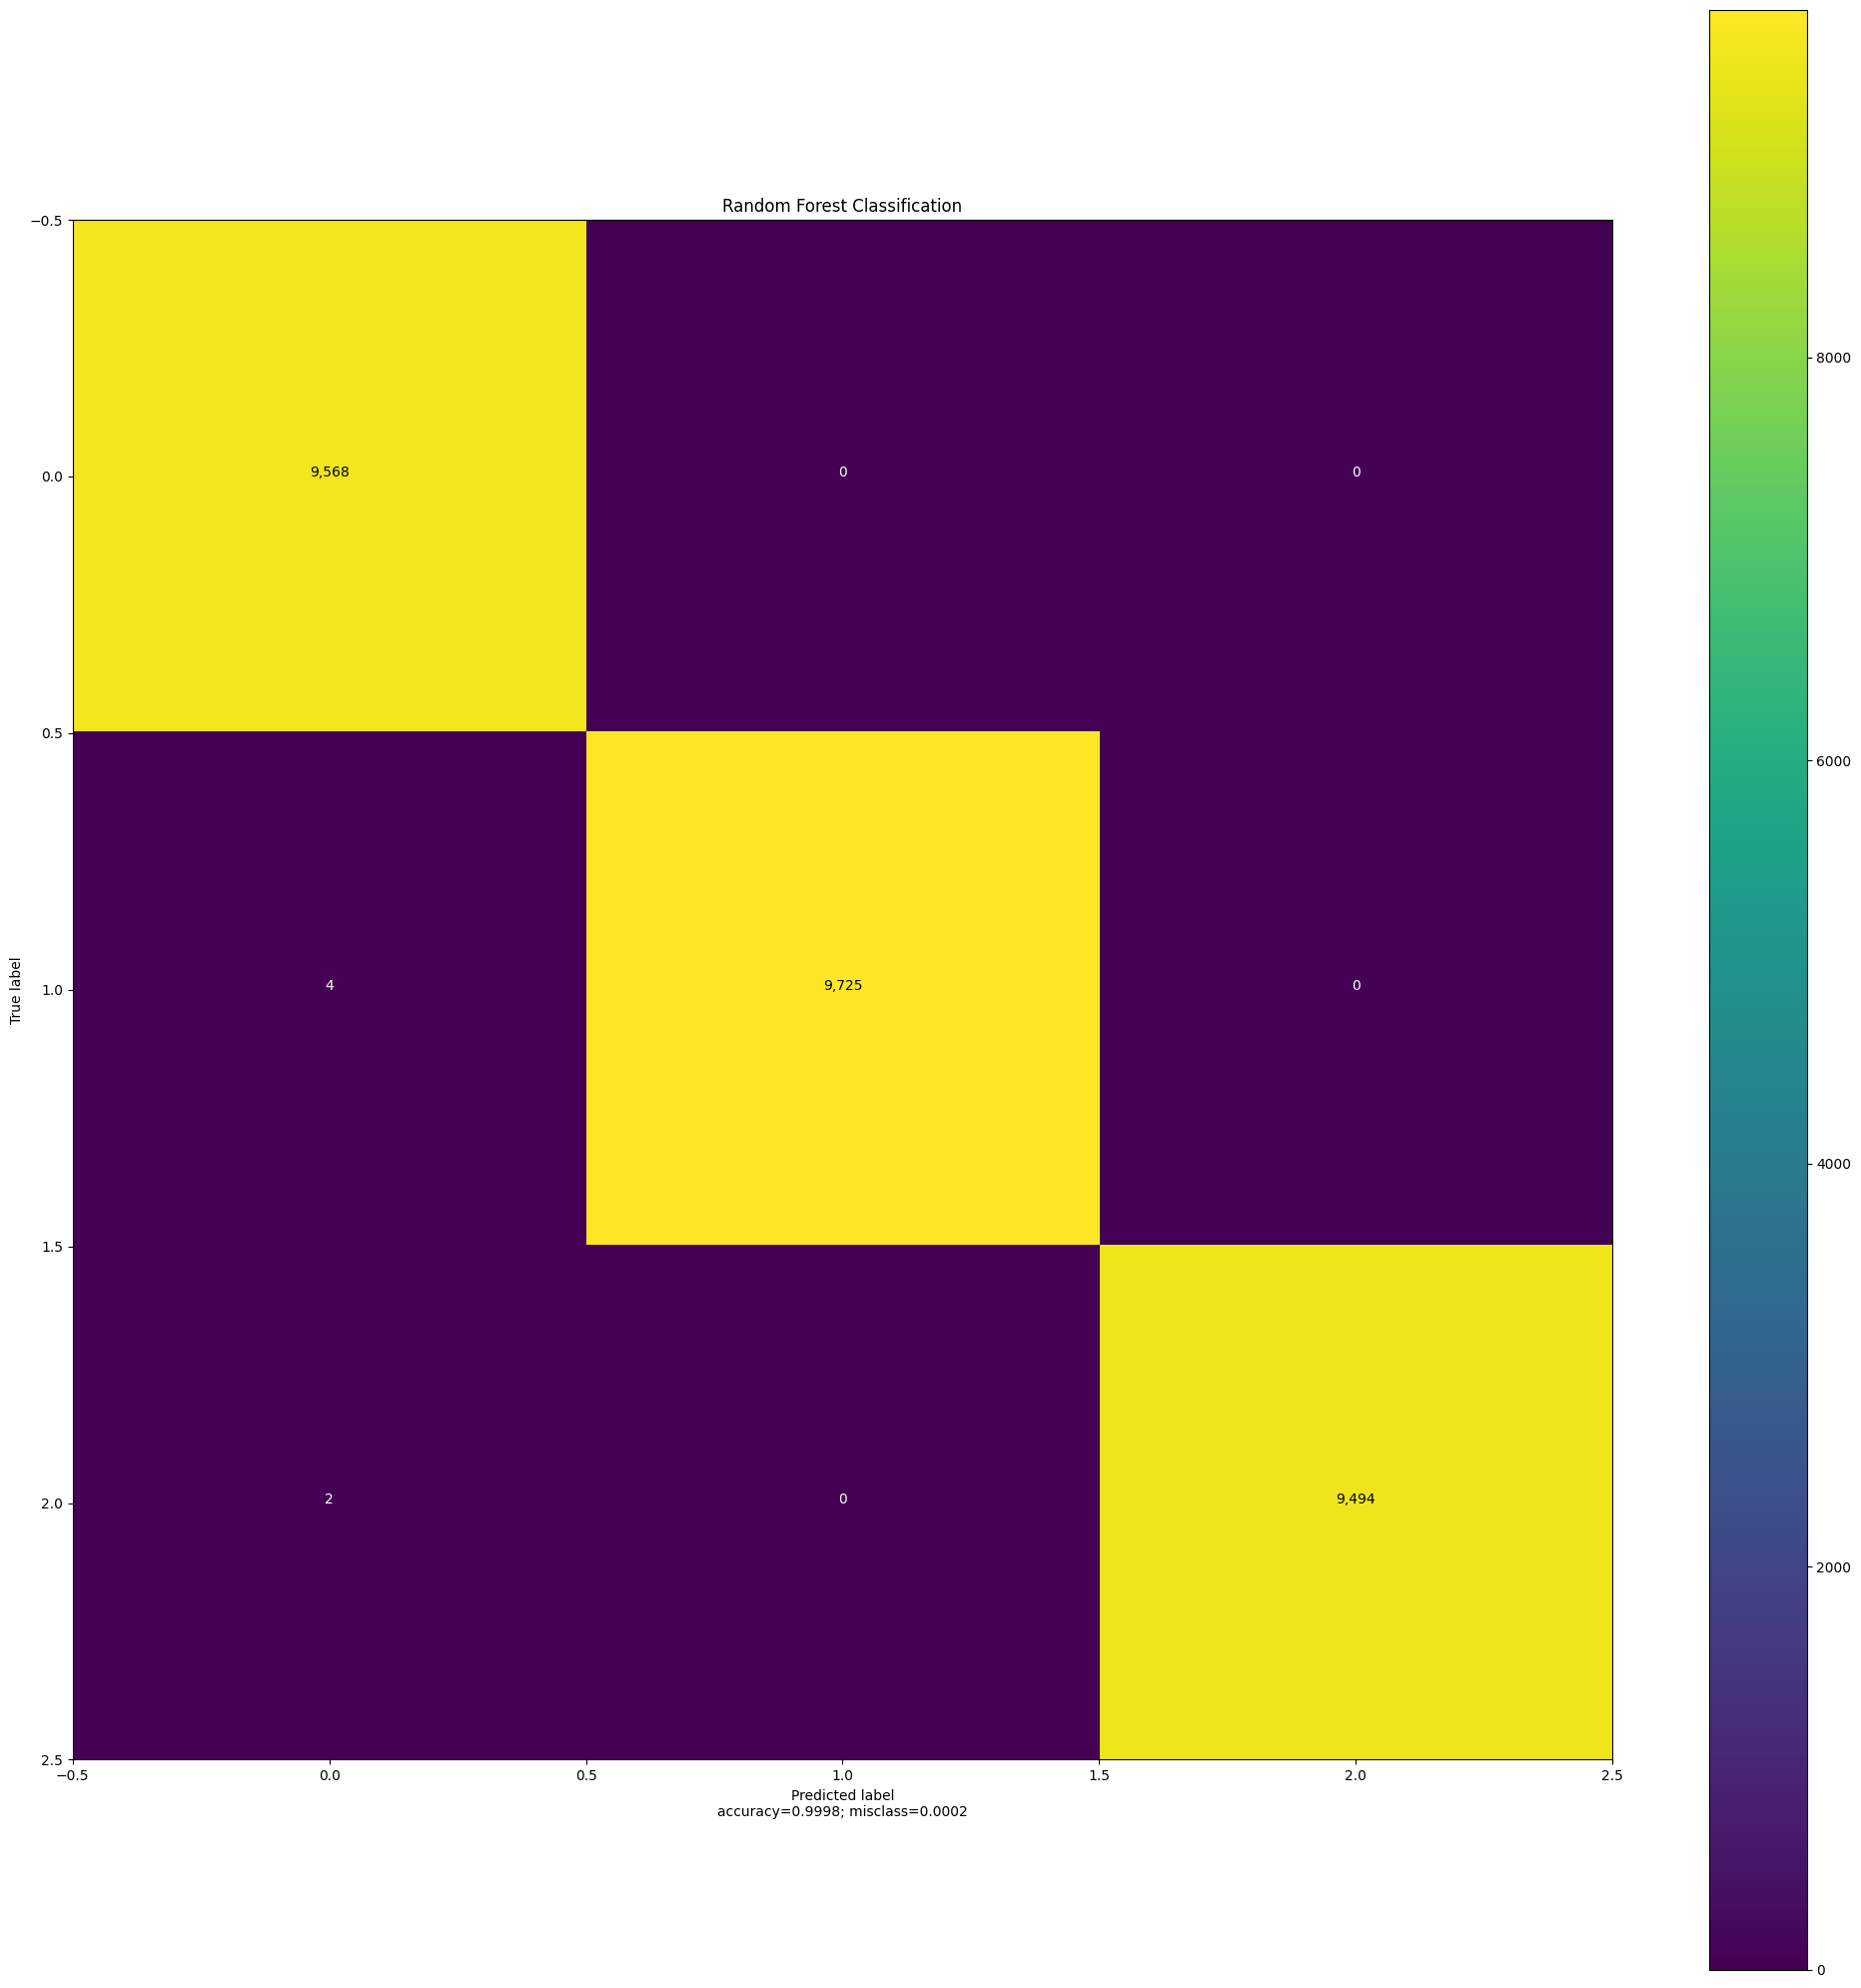

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm=confusion_matrix_rf ,title= 'Random Forest Classification')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Predict the labels for the test data
predict_X_knn = knn_model.predict(X_test)

# Calculate the cross-validation scores
scores_knn = cross_val_score(knn_model, X_test, Y_test, cv=7)

# Compute the accuracy score
accuracy_knn = metrics.accuracy_score(Y_test, predict_X_knn)

# Construct the confusion matrix
confusion_matrix_knn = metrics.confusion_matrix(Y_test, predict_X_knn)

# Generate the classification report
classification_knn = metrics.classification_report(Y_test, predict_X_knn)

# Print the results
print()
print('--------------------------- Results --------------------------------')
print()
print("Cross Validation Mean Score:\n", scores_knn.mean())
print()
print("Model Accuracy:\n", accuracy_knn)
print()
print("Confusion matrix:\n", confusion_matrix_knn)
print()
print("Classification report:\n", classification_knn)
print()



--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9978814089849791

Model Accuracy:
 0.9989580800889105

Confusion matrix:
 [[9551    9    8]
 [   6 9723    0]
 [   7    0 9489]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      9568
        DDoS       1.00      1.00      1.00      9729
    PortScan       1.00      1.00      1.00      9496

    accuracy                           1.00     28793
   macro avg       1.00      1.00      1.00     28793
weighted avg       1.00      1.00      1.00     28793




In [ ]:
plot_confusion_matrix(cm=confusion_matrix_knn ,title= 'Random Forest Classification')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create an instance of the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, Y_train)

# Predict the labels for the test data
predict_X_dt = dt_model.predict(X_test)

# Calculate the cross-validation scores
scores_dt = cross_val_score(dt_model, X_test, Y_test, cv=7)

# Compute the accuracy score
accuracy_dt = metrics.accuracy_score(Y_test, predict_X_dt)

# Construct the confusion matrix
confusion_matrix_dt = metrics.confusion_matrix(Y_test, predict_X_dt)

# Generate the classification report
classification_dt = metrics.classification_report(Y_test, predict_X_dt)

# Print the results
print()
print('--------------------------- Results --------------------------------')
print()
print("Cross Validation Mean Score:\n", scores_dt.mean())
print()
print("Model Accuracy:\n", accuracy_dt)
print()
print("Confusion matrix:\n", confusion_matrix_dt)
print()
print("Classification report:\n", classification_dt)
print()



--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.99913173219086

Model Accuracy:
 0.9994095787170493

Confusion matrix:
 [[9561    6    1]
 [   3 9726    0]
 [   7    0 9489]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      9568
        DDoS       1.00      1.00      1.00      9729
    PortScan       1.00      1.00      1.00      9496

    accuracy                           1.00     28793
   macro avg       1.00      1.00      1.00     28793
weighted avg       1.00      1.00      1.00     28793




In [ ]:
plot_confusion_matrix(cm=confusion_matrix_dt ,title= 'Random Forest Classification')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an instance of the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, Y_train)

# Predict the labels for the test data
predict_X_svm = svm_model.predict(X_test)

# Calculate the cross-validation scores
scores_svm = cross_val_score(svm_model, X_test, Y_test, cv=7)

# Compute the accuracy score
accuracy_svm = metrics.accuracy_score(Y_test, predict_X_svm)

# Construct the confusion matrix
confusion_matrix_svm = metrics.confusion_matrix(Y_test, predict_X_svm)

# Generate the classification report
classification_svm = metrics.classification_report(Y_test, predict_X_svm)

# Print the results
print()
print('--------------------------- Results --------------------------------')
print()
print("Cross Validation Mean Score:\n", scores_svm.mean())
print()
print("Model Accuracy:\n", accuracy_svm)
print()
print("Confusion matrix:\n", confusion_matrix_svm)
print()
print("Classification report:\n", classification_svm)
print()



--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9904837534051543

Model Accuracy:
 0.991629910047581

Confusion matrix:
 [[9353  200   15]
 [   6 9723    0]
 [  20    0 9476]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99      9568
        DDoS       0.98      1.00      0.99      9729
    PortScan       1.00      1.00      1.00      9496

    accuracy                           0.99     28793
   macro avg       0.99      0.99      0.99     28793
weighted avg       0.99      0.99      0.99     28793




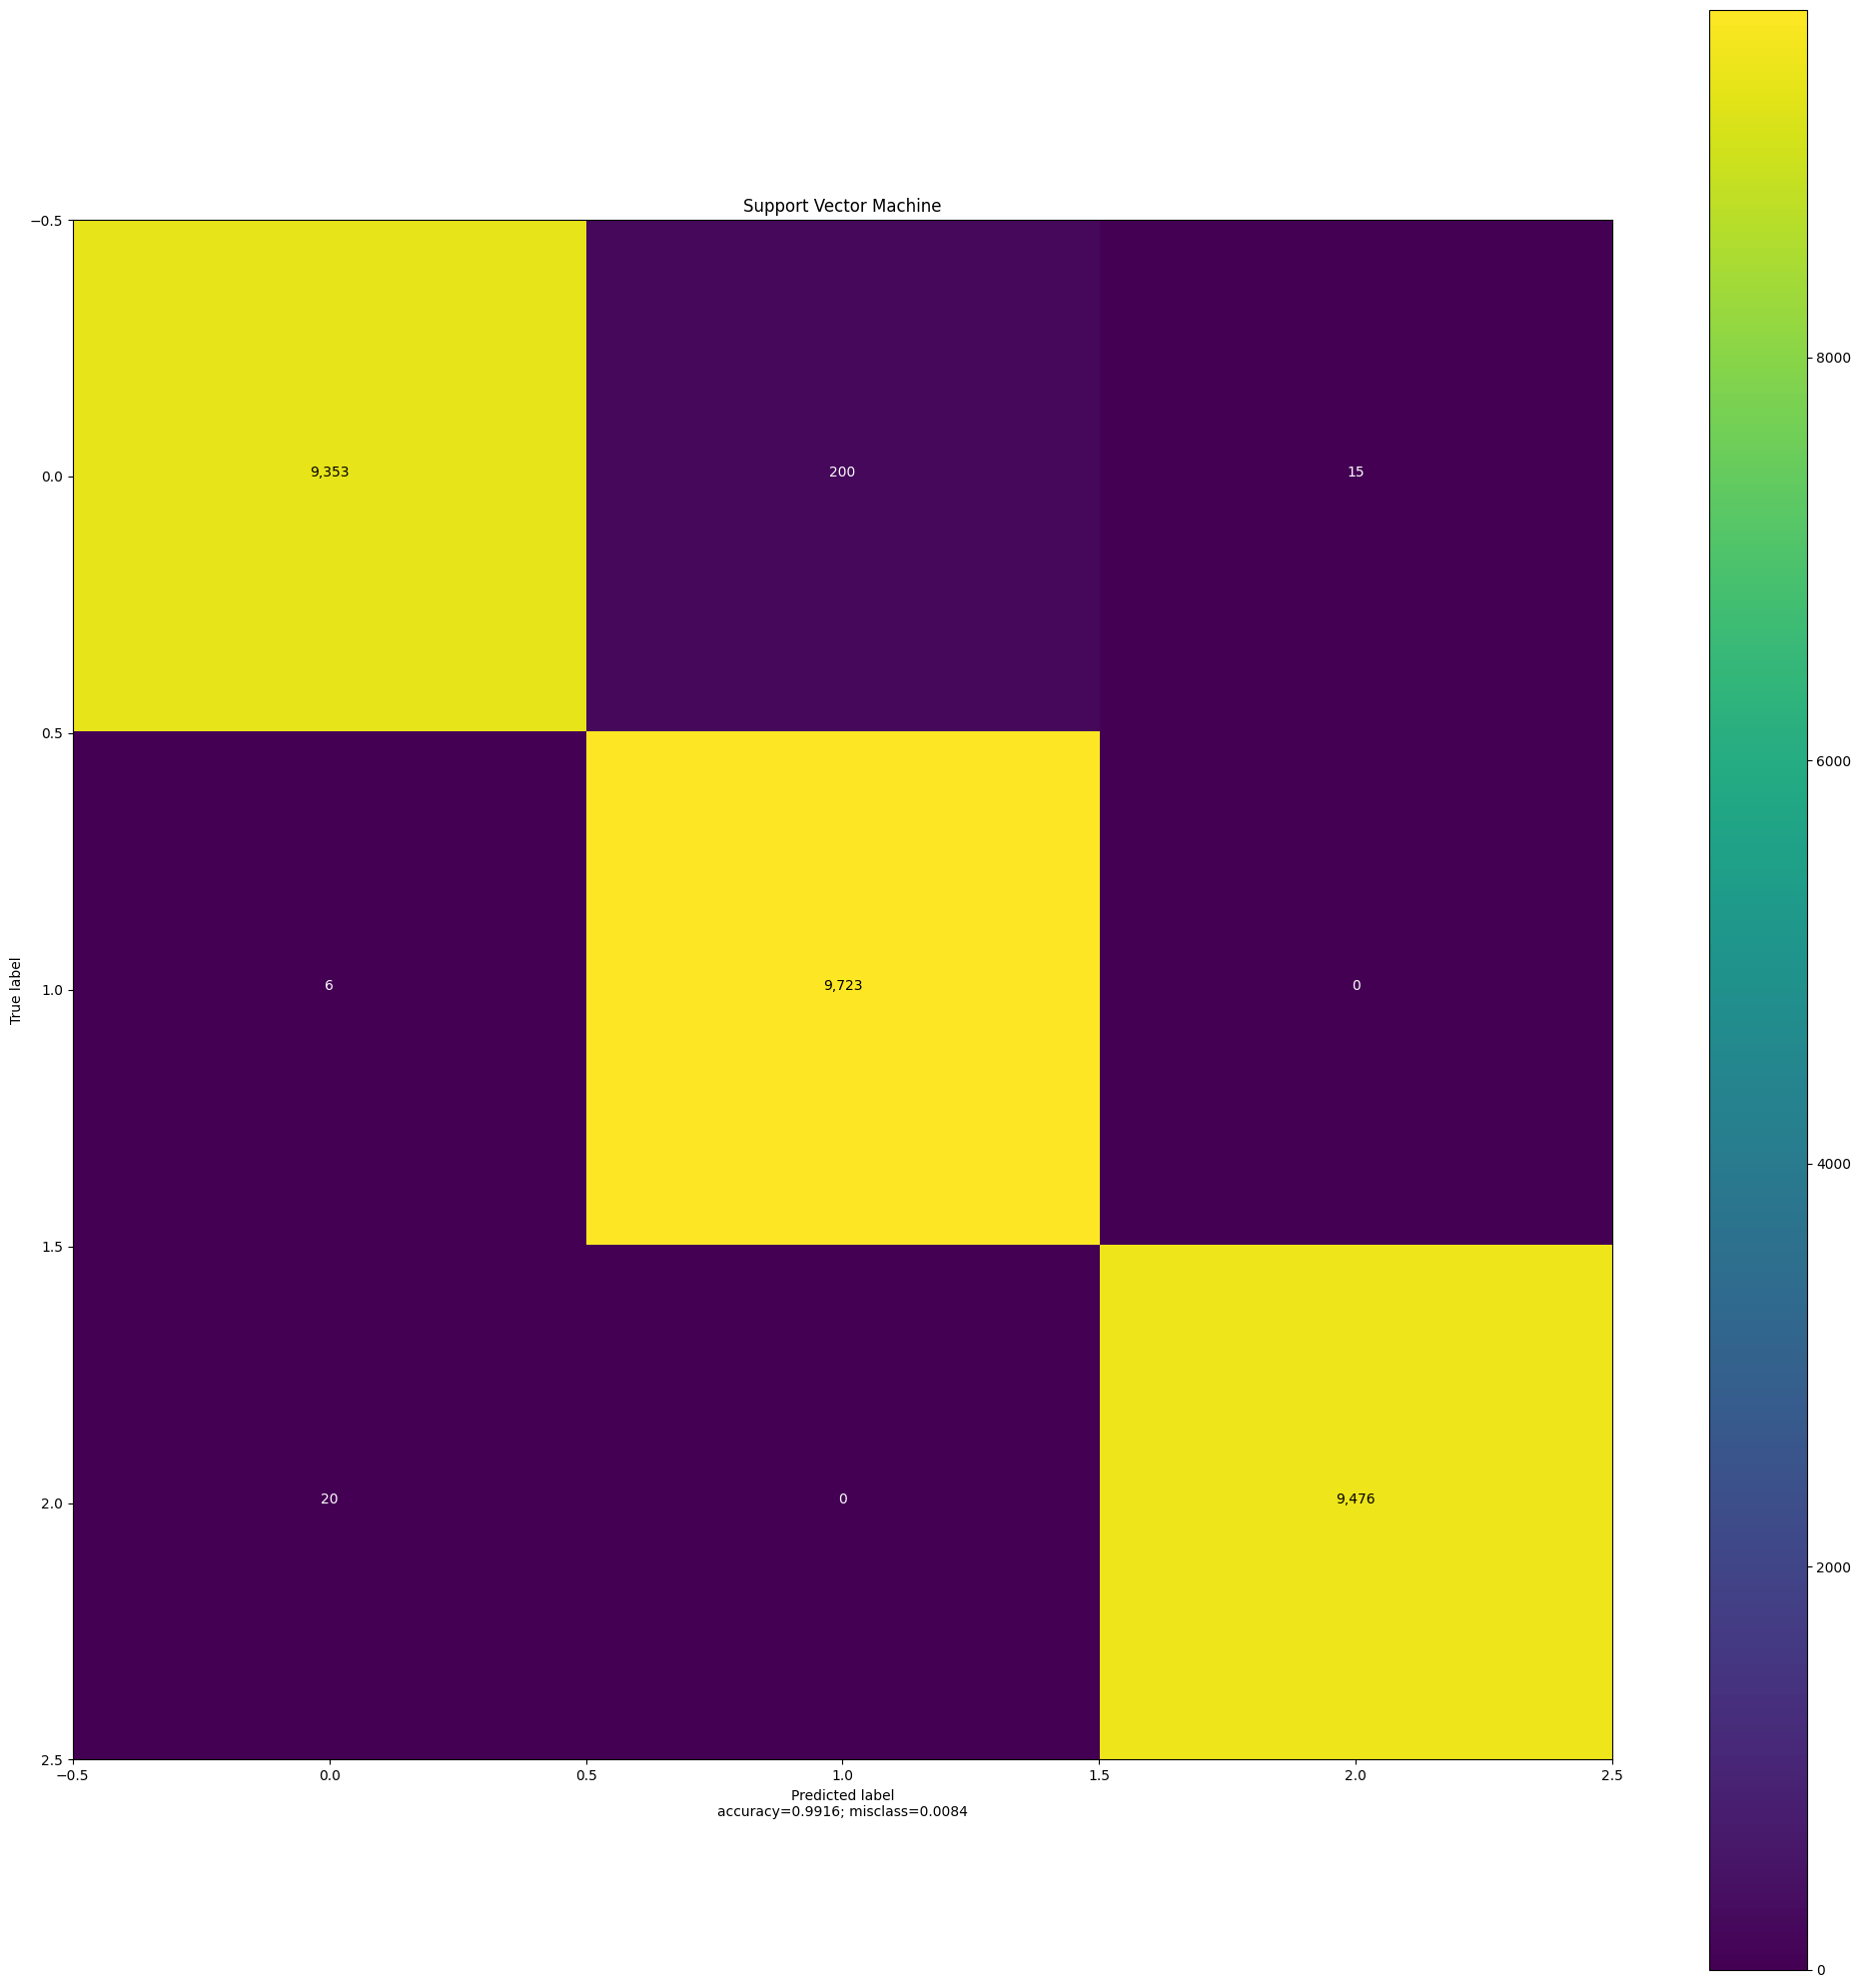

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm=confusion_matrix_svm ,title= 'Random Forest Classification')

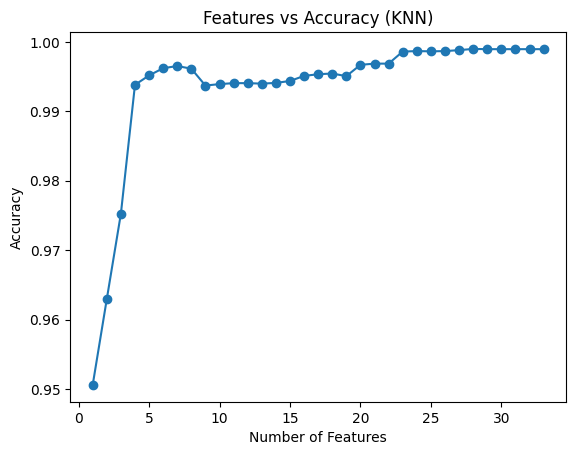

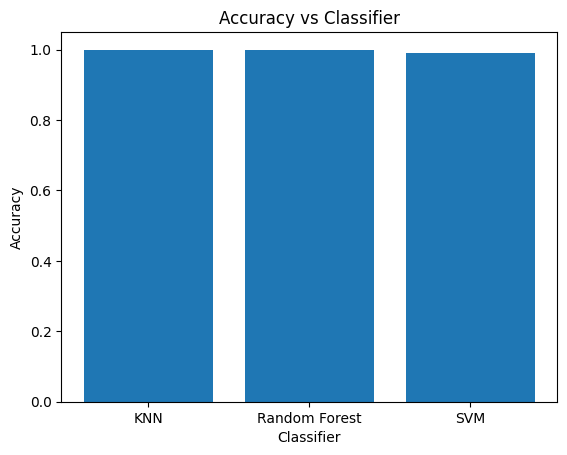

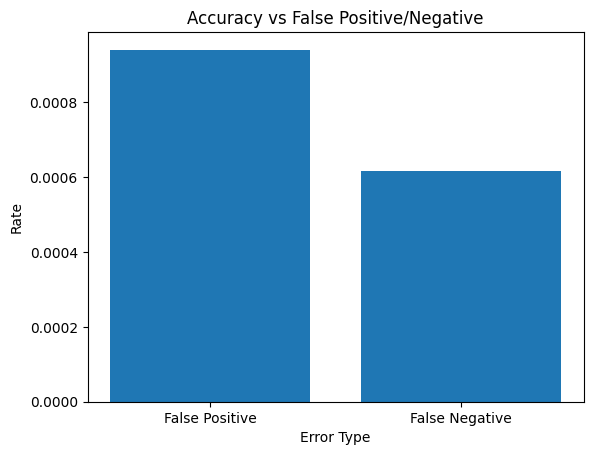

In [ ]:
# Generate Features vs Accuracy graph
num_features = np.arange(1, X_train.shape[1] + 1)
accuracy_scores = []

for num in num_features:
    selected_features = X_train[:, :num]
    knn_model.fit(selected_features, Y_train)
    predict_X_knn = knn_model.predict(X_test[:, :num])
    accuracy = metrics.accuracy_score(Y_test, predict_X_knn)
    accuracy_scores.append(accuracy)

plt.plot(num_features, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Features vs Accuracy (KNN)')
plt.show()

# Generate Accuracy vs Classifier graph
classifiers = ['KNN', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_svm]

plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifier')
plt.show()

# Generate Accuracy vs False Positive/Negative graph
false_positive_rate = confusion_matrix_knn[0, 1] / np.sum(confusion_matrix_knn[0])
false_negative_rate = confusion_matrix_knn[1, 0] / np.sum(confusion_matrix_knn[1])

categories = ['False Positive', 'False Negative']
rates = [false_positive_rate, false_negative_rate]

plt.bar(categories, rates)
plt.xlabel('Error Type')
plt.ylabel('Rate')
plt.title('Accuracy vs False Positive/Negative')
plt.show()


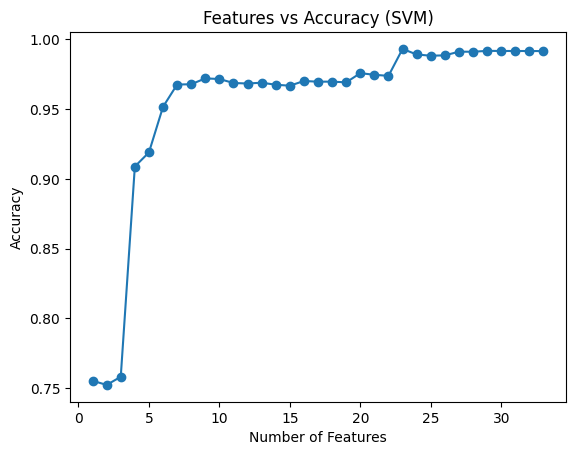

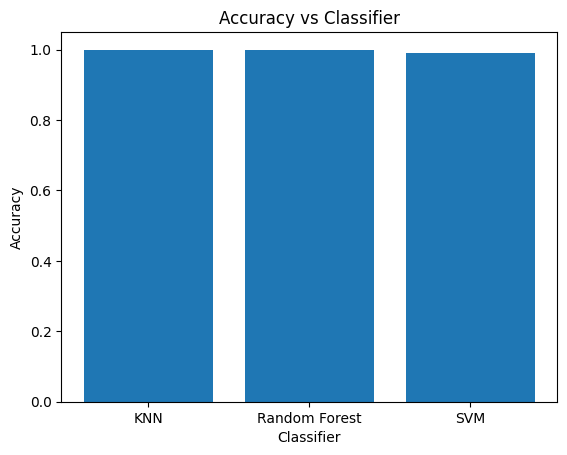

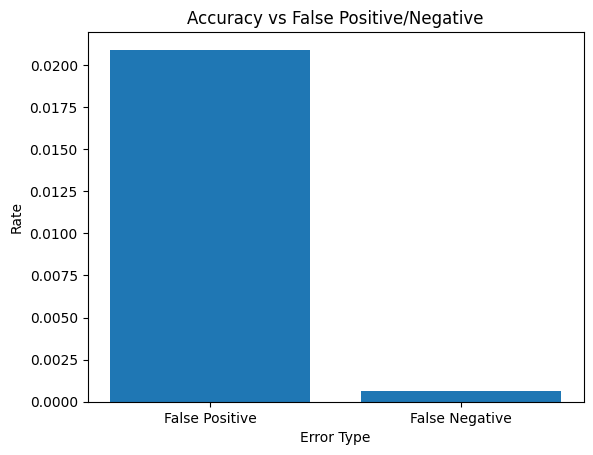

In [ ]:
# Generate Features vs Accuracy graph
num_features = np.arange(1, X_train.shape[1] + 1)
accuracy_scores = []

for num in num_features:
    selected_features = X_train[:, :num]
    svm_model.fit(selected_features, Y_train)
    predict_X_svm = svm_model.predict(X_test[:, :num])
    accuracy = metrics.accuracy_score(Y_test, predict_X_svm)
    accuracy_scores.append(accuracy)

plt.plot(num_features, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Features vs Accuracy (SVM)')
plt.show()

# Generate Accuracy vs Classifier graph
classifiers = ['KNN', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_svm]

plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifier')
plt.show()

# Generate Accuracy vs False Positive/Negative graph
false_positive_rate = confusion_matrix_svm[0, 1] / np.sum(confusion_matrix_svm[0])
false_negative_rate = confusion_matrix_svm[1, 0] / np.sum(confusion_matrix_svm[1])

categories = ['False Positive', 'False Negative']
rates = [false_positive_rate, false_negative_rate]

plt.bar(categories, rates)
plt.xlabel('Error Type')
plt.ylabel('Rate')
plt.title('Accuracy vs False Positive/Negative')
plt.show()


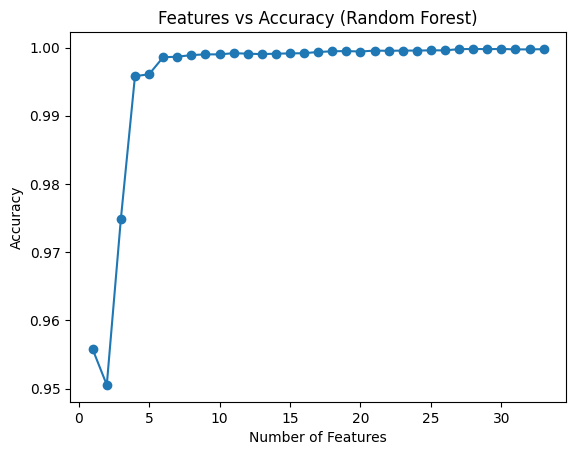

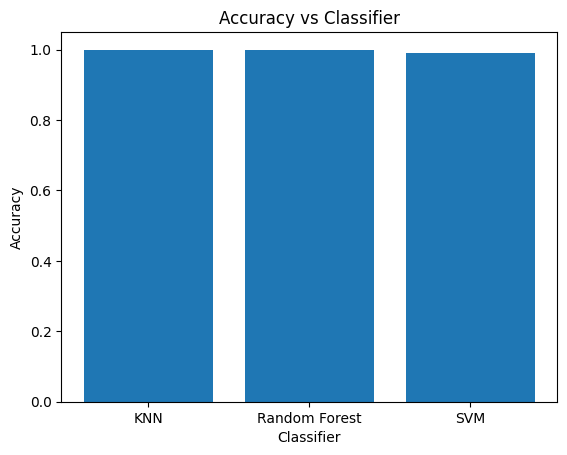

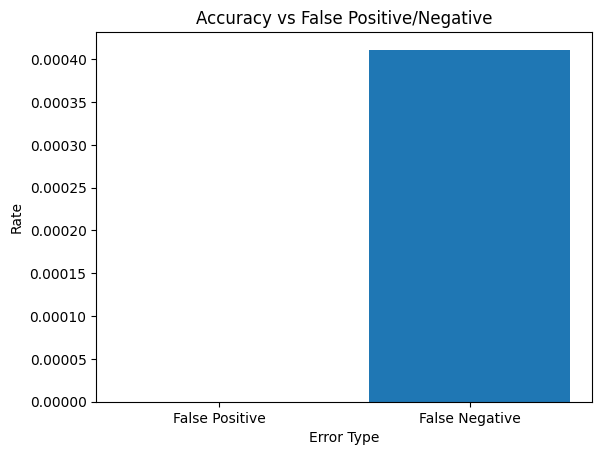

In [ ]:
# Generate Features vs Accuracy graph
num_features = np.arange(1, X_train.shape[1] + 1)
accuracy_scores = []

for num in num_features:
    selected_features = X_train[:, :num]
    Random_Forest.fit(selected_features, Y_train)
    predict_X_rf = Random_Forest.predict(X_test[:, :num])
    accuracy = metrics.accuracy_score(Y_test, predict_X_rf)
    accuracy_scores.append(accuracy)

plt.plot(num_features, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Features vs Accuracy (Random Forest)')
plt.show()

# Generate Accuracy vs Classifier graph
classifiers = ['KNN', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_svm]

plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifier')
plt.show()

# Generate Accuracy vs False Positive/Negative graph
false_positive_rate = confusion_matrix_rf[0, 1] / np.sum(confusion_matrix_rf[0])
false_negative_rate = confusion_matrix_rf[1, 0] / np.sum(confusion_matrix_rf[1])

categories = ['False Positive', 'False Negative']
rates = [false_positive_rate, false_negative_rate]

plt.bar(categories, rates)
plt.xlabel('Error Type')
plt.ylabel('Rate')
plt.title('Accuracy vs False Positive/Negative')
plt.show()


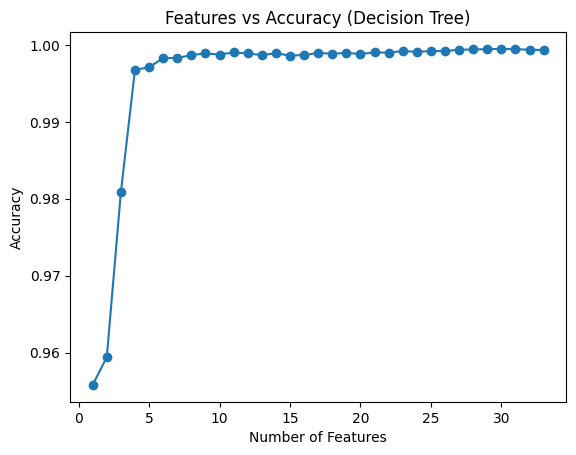

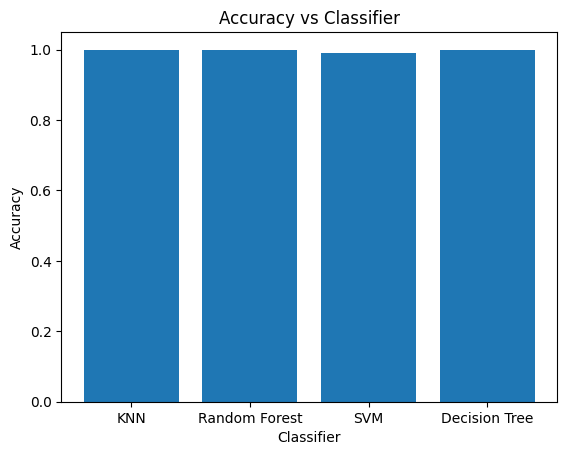

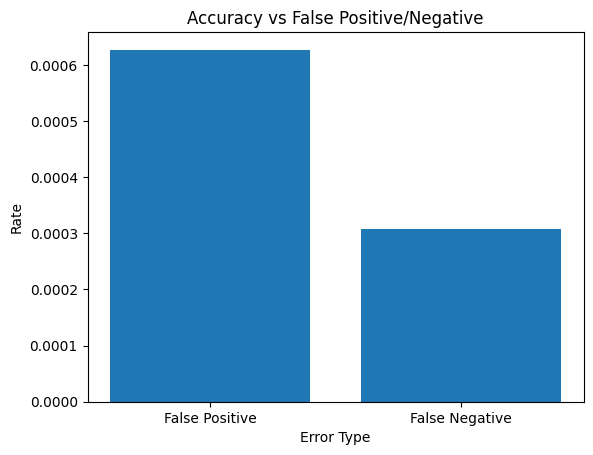

In [ ]:
# Generate Features vs Accuracy graph
num_features = np.arange(1, X_train.shape[1] + 1)
accuracy_scores = []

for num in num_features:
    selected_features = X_train[:, :num]
    dt_model.fit(selected_features, Y_train)
    predict_X_dt = dt_model.predict(X_test[:, :num])
    accuracy = metrics.accuracy_score(Y_test, predict_X_dt)
    accuracy_scores.append(accuracy)

plt.plot(num_features, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Features vs Accuracy (Decision Tree)')
plt.show()

# Generate Accuracy vs Classifier graph
classifiers = ['KNN', 'Random Forest', 'SVM', 'Decision Tree']
accuracy_scores = [accuracy_knn, accuracy_rf, accuracy_svm, accuracy_dt]

plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifier')
plt.show()

# Generate Accuracy vs False Positive/Negative graph
false_positive_rate = confusion_matrix_dt[0, 1] / np.sum(confusion_matrix_dt[0])
false_negative_rate = confusion_matrix_dt[1, 0] / np.sum(confusion_matrix_dt[1])

categories = ['False Positive', 'False Negative']
rates = [false_positive_rate, false_negative_rate]

plt.bar(categories, rates)
plt.xlabel('Error Type')
plt.ylabel('Rate')
plt.title('Accuracy vs False Positive/Negative')
plt.show()
